In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt



### Data processing


In [2]:
#LOAD The data
path = 'dataset_mood_smartphone.csv'
df = pd.read_csv(path, header=0, sep=',', index_col=0)

#Split time column into time and date
date, time = df['time'].str.split(' ', 1).str
df.drop(labels=['time'], axis=1,inplace = True)
df.insert(1, 'date', date)
df.insert(2, 'time', time)

#sort on id and date
df = df.sort_values(by=['id', 'date'])

#Get the unique id's and data variables
ids = df.id.unique()
inputs = df.variable.unique()
uniquedays = df.date.unique()


In [3]:
#function to merge the days of the variables per patient  ##Note takes a while to complete
def mergedays(df):
    table = pd.DataFrame(columns=['id','date', 'variable', 'value'])
    ids = df.id.unique()
    #Rebuild the dataframe for every patient, day , variable
    i = 0
    for patientid in ids:
        patientdata = df.loc[df['id'] == patientid]
        days = patientdata.date.unique()
        for day in days:
            daydata = patientdata.loc[patientdata['date'] == day]
            variables = daydata.variable.unique()
            for var in variables:
                if var == 'mood' or var == 'circumplex.arousal' or var == 'circumplex.valence':
                    value = daydata.loc[daydata['variable'] == var].mean()[0]
                else:
                    #note due to sum suming over all indexing is needed
                    value = daydata.loc[daydata['variable'] == var].sum()[4]

                #print([patientid,day,var,value])
                table.loc[i] = [patientid,day,var,value]
                i+=1
    return table

In [4]:
#STATUS PRINTS      #NOTE before cleaning
print("STATISTICS")
print("The amount of unique ids are: ", len(ids), "\n", ids)
print("Amount of unique days are: ", len(uniquedays), "\n", uniquedays)
print("\nThe variables used are:\n", inputs)

print("\nErrors are within:  circumplex.valence 156 NA & circumplex.arousal 46 NA")
print("The count and amount of data inputs do not match")

print("\nHow many data points per id:")
datalist = []
for i in ids:
    datalist.append(len(df.loc[df['id'] == i]))
    print(i, " amount of data inputs: ", len(df.loc[df['id'] == i]))

vardatalist = []
print("\nHow often are the variables used:")
for j in inputs:
    vardatalist.append(len(df.loc[df['variable'] == j]))
    print(j, "\nAmount of data inputs: ", len(df.loc[df['variable'] == j]))
    print(df.loc[df['variable'] == j].describe(),"\n")
    
    



STATISTICS
The amount of unique ids are:  27 
 ['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
Amount of unique days are:  113 
 ['2014-02-17' '2014-02-18' '2014-02-19' '2014-02-20' '2014-02-21'
 '2014-02-22' '2014-02-25' '2014-02-26' '2014-02-27' '2014-02-28'
 '2014-03-01' '2014-03-03' '2014-03-05' '2014-03-06' '2014-03-07'
 '2014-03-10' '2014-03-11' '2014-03-12' '2014-03-13' '2014-03-14'
 '2014-03-15' '2014-03-16' '2014-03-17' '2014-03-18' '2014-03-19'
 '2014-03-20' '2014-03-21' '2014-03-22' '2014-03-23' '2014-03-24'
 '2014-03-25' '2014-03-26' '2014-03-27' '2014-03-28' '2014-03-29'
 '2014-03-30' '2014-03-31' '2014-04-01' '2014-04-02' '2014-04-03'
 '2014-04-04' '2014-04-05' '2014-04-06' '2014-04-07' '2014-04-08'
 '2014-04-09' '2014-04-10' '2014-04-11' '2014-04-1

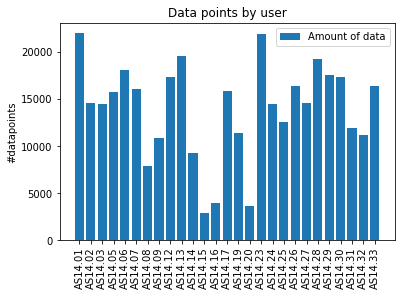

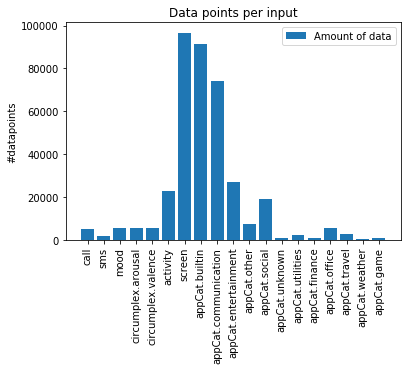

In [5]:
#plot the data points per id
fig, ax = plt.subplots()
ax.bar(np.arange(len(ids)),datalist,0.8,label='Amount of data')
ax.set_ylabel('#datapoints')
ax.set_title('Data points by user')
ax.set_xticks(np.arange(len(ids)))
ax.set_xticklabels(('AS14.01','AS14.02','AS14.03','AS14.05','AS14.06','AS14.07','AS14.08'
 ,'AS14.09', 'AS14.12', 'AS14.13','AS14.14','AS14.15','AS14.16','AS14.17',
 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24', 'AS14.25', 'AS14.26','AS14.27',
 'AS14.28', 'AS14.29', 'AS14.30','AS14.31','AS14.32','AS14.33'),rotation='vertical')
ax.legend()
plt.show()


#plot data points per variable
fig, bx = plt.subplots()
bx.bar(np.arange(len(inputs)),vardatalist,0.8,label='Amount of data')
bx.set_ylabel('#datapoints')
bx.set_title('Data points per input')
bx.set_xticks(np.arange(len(inputs)))
bx.set_xticklabels(('call','sms','mood','circumplex.arousal','circumplex.valence','activity'
 ,'screen','appCat.builtin','appCat.communication','appCat.entertainment'
 ,'appCat.other','appCat.social','appCat.unknown','appCat.utilities'
 ,'appCat.finance','appCat.office','appCat.travel','appCat.weather'
 ,'appCat.game'),rotation='vertical')
bx.legend()
plt.show()

In [6]:
#days over patients


In [7]:
# Clean data from NA
df = df.dropna(axis=0, how='any')

###Check to see the cleaning result
# print("\nHow often are the variables used:")
# for j in inputs:
#     print(j, "\nAmount of data inputs: ", len(df.loc[df['variable'] == j]))
#     print(df.loc[df['variable'] == j].describe(),"\n")
###
print(df)

              id        date          time            variable   value
136471   AS14.01  2014-02-17  12:04:42.394                call   1.000
136472   AS14.01  2014-02-17  18:28:25.520                call   1.000
136473   AS14.01  2014-02-18  09:29:51.257                call   1.000
136474   AS14.01  2014-02-19  14:43:30.575                call   1.000
136475   AS14.01  2014-02-19  17:29:10.378                call   1.000
136476   AS14.01  2014-02-19  17:42:16.499                call   1.000
136477   AS14.01  2014-02-19  17:43:18.061                call   1.000
136478   AS14.01  2014-02-19  17:44:01.594                call   1.000
136479   AS14.01  2014-02-19  18:07:50.055                call   1.000
136480   AS14.01  2014-02-19  18:10:06.385                call   1.000
141710   AS14.01  2014-02-19  17:42:34.292                 sms   1.000
141711   AS14.01  2014-02-19  21:25:04.397                 sms   1.000
136481   AS14.01  2014-02-20  13:42:05.309                call   1.000
136482

In [8]:
#Write / load the data

fname = "adjusted_data.csv"
my_file = Path(fname)
if my_file.exists():
    print("file found, loading in now")
    df = pd.read_csv(fname, header=0, sep=',', index_col=0)
else:
    print("file not found")
    df = mergedays(df)
    df.to_csv(fname, sep=',')
    print("writing completed")

print(df)

file found, loading in now
            id        date              variable        value
0      AS14.01  2014-02-17                  call     2.000000
1      AS14.01  2014-02-18                  call     1.000000
2      AS14.01  2014-02-19                  call     7.000000
3      AS14.01  2014-02-19                   sms     2.000000
4      AS14.01  2014-02-20                  call     2.000000
5      AS14.01  2014-02-20                   sms     3.000000
6      AS14.01  2014-02-21                   sms     1.000000
7      AS14.01  2014-02-22                  call     2.000000
8      AS14.01  2014-02-22                   sms     1.000000
9      AS14.01  2014-02-25                  call     3.000000
10     AS14.01  2014-02-26                  mood     6.250000
11     AS14.01  2014-02-26    circumplex.arousal    -0.250000
12     AS14.01  2014-02-26    circumplex.valence     0.750000
13     AS14.01  2014-02-26                  call     1.000000
14     AS14.01  2014-02-26                 

In [9]:
# Feli
#TODO benchmark x=y 


In [10]:
#Model one  Michael

In [226]:
# Import libraries
from pandas import tseries
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats

In [380]:
#Model two Cecilia
#Data preprocessing
# Get the information of patient 1
# Write it to csv file
#p_1=df.loc[df['id']=='AS14.01']
#p_1.to_csv('patient_1.csv', sep=',')
p_1 = pd.read_csv('patient_1.csv', header=0, sep=',', index_col=0)
mood=Series.from_csv('patient_1_mood.csv', header=0)

/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [383]:
#Data preprocessing SARIMAX 
# Granger causality test
def g_c(data):
    for k in data.columns:
        print('\n')
        print(k)
        print(grangercausalitytests(data[['mood', k]].dropna(),1))
        print(grangercausalitytests(data[[k, 'mood']].dropna(),1))
        print('\n')
g_c(p_1)



activity

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2214  , p=0.6405  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2376  , p=0.6260  , df=1
likelihood ratio test: chi2=0.2369  , p=0.6264  , df=1
parameter F test:         F=0.2214  , p=0.6405  , df_denom=41, df_num=1
{1: ({'ssr_ftest': (0.22137554269556858, 0.6404873003790965, 41.0, 1), 'ssr_chi2test': (0.23757375313670775, 0.6259639961414297, 1), 'lrtest': (0.23693467425963632, 0.6264288736983192, 1), 'params_ftest': (0.22137554269558946, 0.6404873003790792, 41.0, 1)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f5db79a65c0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f5db79a6e80>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0017  , p=0.0308  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=5.3677  , p=0.0205  , df=1
likelihood ratio test: chi2=5.0647  , p=0.0244  , df=1

ValueError: Insufficient observations. Maximum allowable lag is -1

In [384]:
#Model construction ARIMA for  Patient 01
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7,center=False).mean()
    rolstd = timeseries.rolling(window=7,center=False).std()
    plt.figure()
    #Plot rolling statistics:
    plt.figure()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Decompose the trend
    plt.figure()
    decompose=seasonal_decompose(timeseries)
    dec=decompose.plot()
    dec.set_size_inches(25,16)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

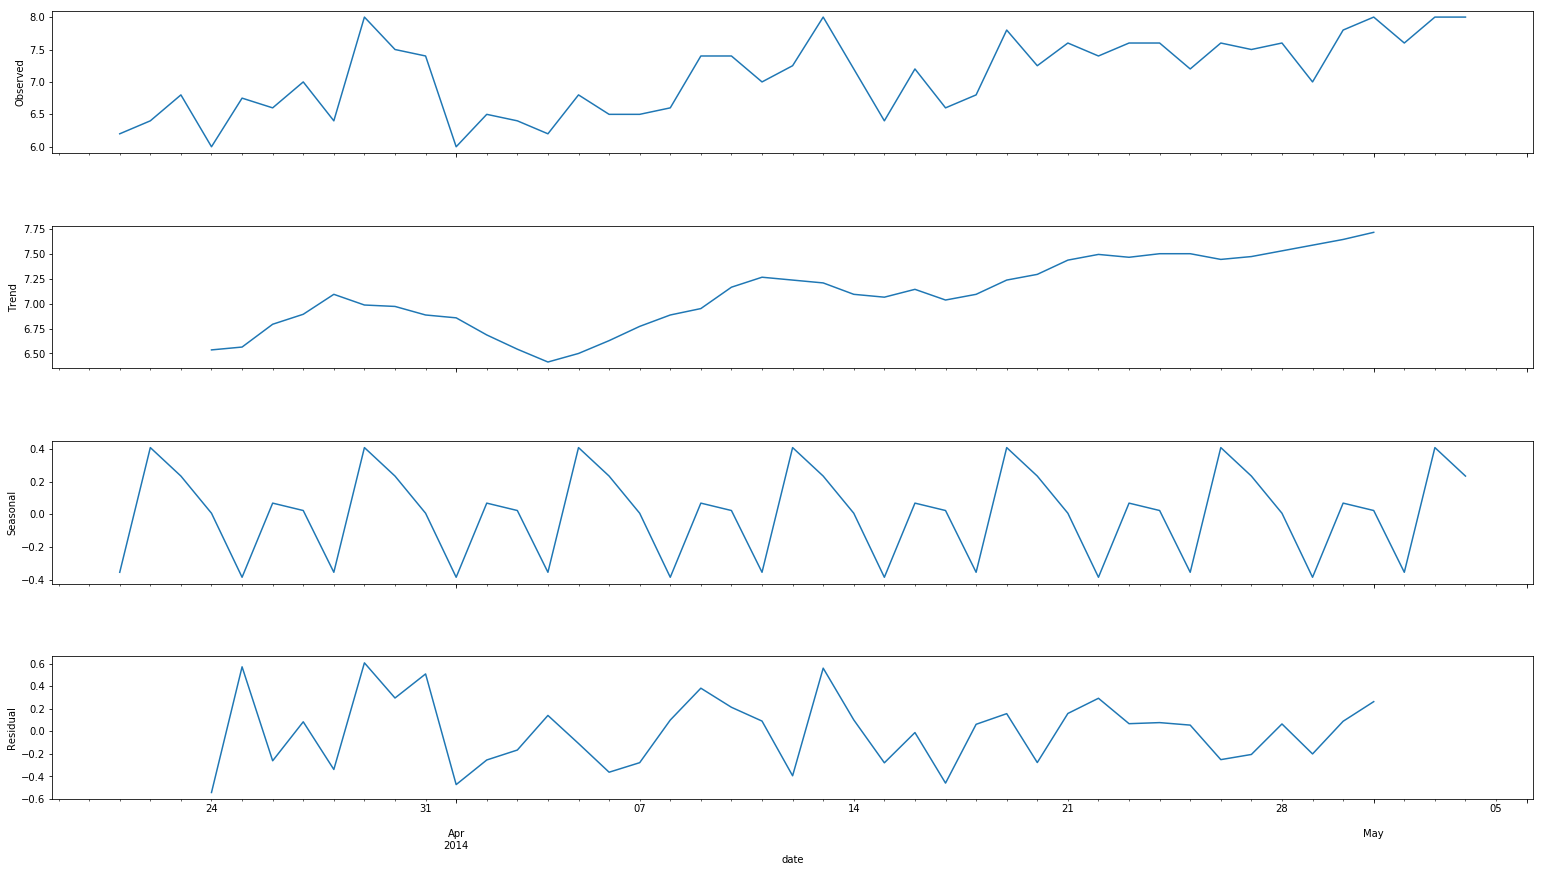

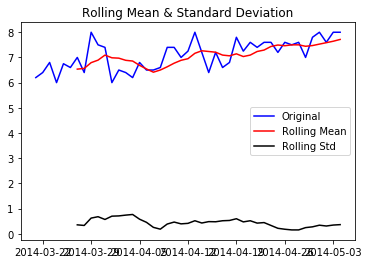

Results of Dickey-Fuller Test:
Test Statistic                 -3.679622
p-value                         0.004409
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [391]:
test_stationarity(mood)

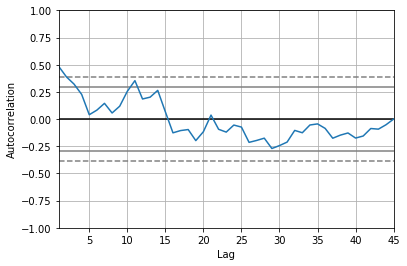

In [394]:
#utocorrelation plot
plt.figure()
fig_auto=autocorrelation_plot(mood.values)
plt.show(fig_auto)

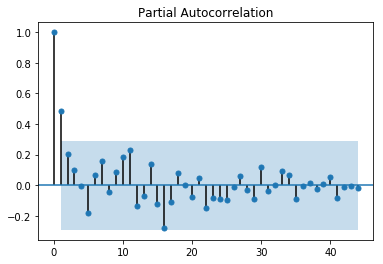

In [393]:
#Partial autocorrelation plot
plt.figure()
fig=plot_pacf(mood)
plt.show()

In [395]:
# Training and predicting

def arima_t_p(timeseries, p, d, q):
    X = timeseries.values
    train, test = X[:-10], X[-10:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)        
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        e_1=obs-yhat
        e_2=obs-test[t-1]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    E=plt.plot(test, label='expectation')
    P=plt.plot(predictions, color='red', label='prediction')
    bench=plt.plot(X[-11:-1], color='green', label='bench_mark')
    plt.title('Real Benchmark Prediction value comparison')
    plt.legend()
    plt.show()
    return predictions, error


/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=7.495696, expected=7.200000
predicted=7.308087, expected=7.600000
predicted=7.467696, expected=7.500000
predicted=7.462095, expected=7.600000
predicted=7.498003, expected=7.000000
predicted=7.529140, expected=7.800000
predicted=7.522672, expected=8.000000
predicted=7.735646, expected=7.600000
predicted=7.627106, expected=8.000000
predicted=7.946092, expected=8.000000
Test MSE: 0.090


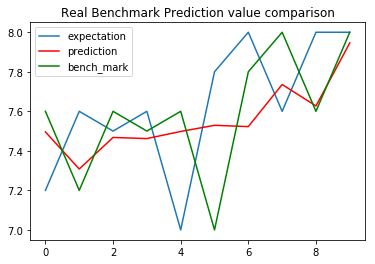

In [248]:
pre,error=arima_t_p(mood, 5, 1, 1)

In [379]:
#Runing the optimal ARIMA models
#def arima_model(timeseries, p,d,)
model=ARIMA(endog=mood,order=(5,1,1))
results=model.fit()
print(results.summary())

/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   44
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -25.587
Method:                       css-mle   S.D. of innovations              0.412
Date:                Sat, 21 Apr 2018   AIC                             67.174
Time:                        21:51:41   BIC                             81.448
Sample:                    03-22-2014   HQIC                            72.468
                         - 05-04-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0290      0.005      6.030      0.000       0.020       0.038
ar.L1.D.value     0.1596      0.142      1.126      0.268      -0.118       0.437
ar.L2.D.value     0.0569      0.142     

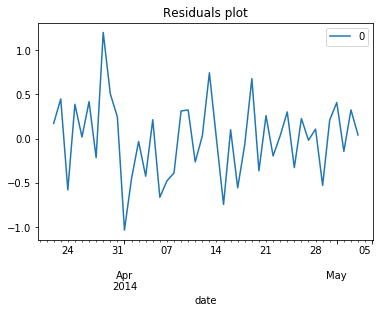

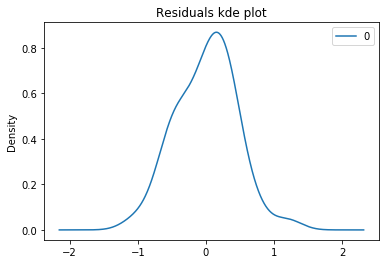

               0
count  44.000000
mean    0.004041
std     0.439096
min    -1.035145
25%    -0.338365
50%     0.029820
75%     0.303297
max     1.198530


In [202]:
# plot residual errors
residuals = pd.DataFrame(results.resid)
plt.figure()
A=residuals.plot()
plt.title("Residuals plot")
B=residuals.plot(kind='kde')
plt.title("Residuals kde plot")
plt.show()
print(residuals.describe())

/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


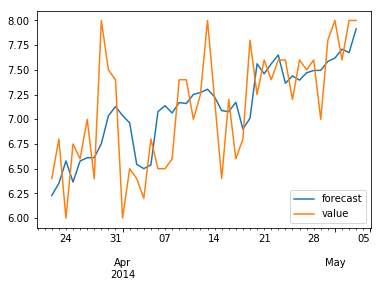

In [377]:
plt.title('Real vs. Forecast ARIMA')
results.plot_predict()

In [396]:
#SARIMAX model construction for patient 01
mood_other=p_1[['activity','appCat.entertainment', 'appCat.finance','circumplex.arousal','circumplex.valence','mood']]
#interpolate the missing values
for j in mood_other.columns:
     mood_other[j]=mood_other[j].interpolate()
mood_other=mood_other.dropna()

/home/cecilia/miniconda3/envs/ml1labs/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [397]:
endog=mood_other['mood']
exog=mood_other[['appCat.entertainment', 'circumplex.arousal','circumplex.valence' ]]

In [398]:
mod=SARIMAX(endog=mood_other['mood'],exog=exog, order=(7,1,2))
res = mod.fit(disp=False)
prediction=res.get_prediction()
print(res.summary())
mse=mean_squared_error(endog[36:], prediction.predicted_mean[36:])
print(mse)

                           Statespace Model Results                           
Dep. Variable:                   mood   No. Observations:                   46
Model:               SARIMAX(7, 1, 2)   Log Likelihood                 -16.753
Date:                Sat, 21 Apr 2018   AIC                             59.507
Time:                        21:53:19   BIC                             83.279
Sample:                    03-21-2014   HQIC                            68.412
                         - 05-05-2014                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
appCat.entertainment  3.739e-05   6.68e-05      0.560      0.576   -9.35e-05       0.000
circumplex.arousal      -0.0260      0.140     -0.185      0.853      -0.300       0.248
circumplex.v

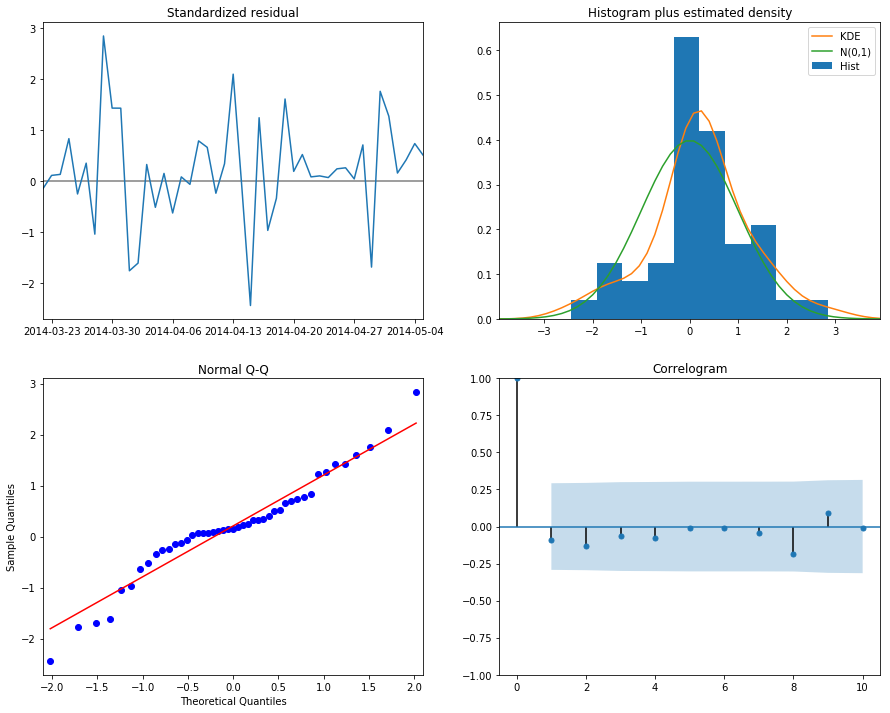

In [264]:
res.plot_diagnostics(figsize=(15, 12))

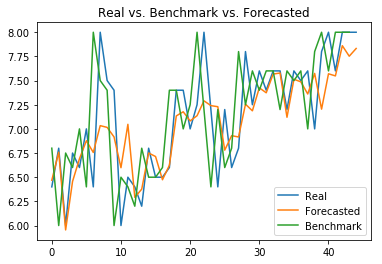

In [339]:
plt.figure()
A=plt.plot(endog.values[1:], label='Real')
B=plt.plot(prediction.predicted_mean.values[1:], label='Forecasted')
C=plt.plot(endog.values[2:], label='Benchmark')
plt.legend()
plt.title("Real vs. Benchmark vs. Forecasted")
plt.show()

In [399]:
%%capture
# Write it to csv file
#p_2=df.loc[df['id']=='AS14.23']
# check the time_series and drop unnecessary datapoints
#p_2 = p_2.groupby(['date','variable']).mean().squeeze().unstack().add_suffix('')
#p_2.to_csv('patient_2.csv', sep=',')
p_2 = pd.read_csv('patient_2.csv', header=0, sep=',', index_col=0)
mood_2=Series.from_csv('patient_2_mood.csv')
mood_2=mood_2.interpolate()
test_stationarity(mood_2)

In [400]:
%%capture
fig_auto=autocorrelation_plot(mood_2.values)
plt.show(fig_auto)
ax2 = fig.add_subplot(212)
fig=plot_pacf(mood_2)
plt.show()

In [404]:
%%capture
pred, mse=arima_t_p(mood_2, 5, 1, 0)

In [405]:
%%capture
model=ARIMA(endog=mood_2,order=(5,1,0))
results=model.fit()
print(results.summary())
results.plot_predict()

In [406]:
%%capture
other=p_2[['activity','appCat.entertainment','circumplex.arousal','circumplex.valence','mood']]
#interpolate the missing values
for j in other.columns:
     other[j]=other[j].interpolate()
other=other.dropna()

In [407]:
%%capture
endog_1=other['mood']
exog_1=other[['circumplex.arousal','circumplex.valence' ]]

In [408]:
%%capture
m=SARIMAX(endog=endog_1,exog=exog_1, order=(7,1,2))
r = m.fit(disp=False)
prediction_1=r.get_prediction()
print(r.summary())
mse=mean_squared_error(endog_1[-10:], prediction_1.predicted_mean[-10:])
print(mse)

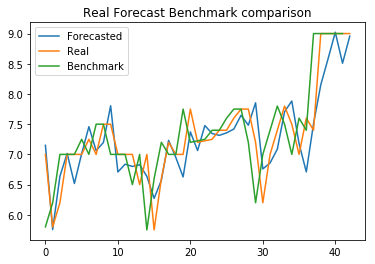

In [410]:
plt.figure()
B=plt.plot(prediction_1.predicted_mean.values[1:], label='Forecasted')
A=plt.plot(endog_1.values[1:], label='Real')
A=plt.plot(endog_1.values[2:], label='Benchmark')
plt.title('Real Forecast Benchmark comparison')
plt.legend()
plt.show()

In [378]:
#Model comparison (benchmark decision tree ARIMA SARIMAX model) patient 01
a=np.abs((mood.values[-10:]-pre)*2)
b=np.abs((mood.values[-10:]-mood.values[-11:-1:])**2)
c=(endog.values[-10:]-prediction.predicted_mean.values[-10:])**2
print("Benchmark vs. Decision Tree")
print(stats.ttest_ind(b, err_DT_pat_01_last_10))
print("Benchmark vs. ARIMA")
print(stats.ttest_ind(b, a))
print("Benchmark vs. SARIMA")
print(stats.ttest_ind(b, c))
print("ARIMA vs. Decision Tree")
print(stats.ttest_ind(a, err_DT_pat_01_last_10))
print("SARIMAX vs. Decision Tree")
print(stats.ttest_ind(c, err_DT_pat_01_last_10))
print("SARIMAX vs. ARIMA")
print(stats.ttest_ind(c, a))

Benchmark vs. Decision Tree
Ttest_indResult(statistic=-1.005967391949808, pvalue=0.3277638353728678)
Benchmark vs. ARIMA
Ttest_indResult(statistic=-2.8251903282478343, pvalue=0.011214095388301806)
Benchmark vs. SARIMA
Ttest_indResult(statistic=0.859622064731987, pvalue=0.4013015454956447)
ARIMA vs. Decision Tree
Ttest_indResult(statistic=2.069310615105665, pvalue=0.05318550152490107)
SARIMAX vs. Decision Tree
Ttest_indResult(statistic=-2.0140823875484903, pvalue=0.05919448694169465)
SARIMAX vs. ARIMA
Ttest_indResult(statistic=-3.628806858387904, pvalue=0.0019201023207159127)


In [375]:
#Model comparison (benchmark decision tree ARIMA SARIMAX model) patient 23
e=(pred-mood_2.values[-10:])**2
f=(mood_2.values[-11:-1]-mood_2.values[-10:])**2
g=(endog_1.values[-10:]-prediction_1.predicted_mean.values[-10:])**2
print("Benchmark vs. Decision Tree")
print(stats.ttest_ind(f, err_DT_pat_23_last_10))
print("Benchmark vs. ARIMA")
print(stats.ttest_ind(f, e))
print("Benchmark vs. SARIMA")
print(stats.ttest_ind(f, g))
print("ARIMA vs. Decision Tree")
print(stats.ttest_ind(e, err_DT_pat_23_last_10))
print("SARIMAX vs. Decision Tree")
print(stats.ttest_ind(g, err_DT_pat_23_last_10))
print("SARIMAX vs. ARIMA")
print(stats.ttest_ind(g, e))
#print(stats.wilcoxon(a,b))
#print(stats.ks_2samp(mood_2.values[-10:],pred))
#print(stats.ks_2samp(mood_2.values[-10:],mood_2.values[-11:-1]))

Benchmark vs. Decision Tree
Ttest_indResult(statistic=-0.02733164780807382, pvalue=0.9784959614631878)
Benchmark vs. ARIMA
Ttest_indResult(statistic=0.08006199116774906, pvalue=0.9370713806247267)
Benchmark vs. SARIMA
Ttest_indResult(statistic=1.3282411040870084, pvalue=0.2006949475397849)
ARIMA vs. Decision Tree
Ttest_indResult(statistic=-0.09498024633273562, pvalue=0.9253798940643577)
SARIMAX vs. Decision Tree
Ttest_indResult(statistic=-1.0545628423956976, pvalue=0.3055756210723587)
SARIMAX vs. ARIMA
Ttest_indResult(statistic=-1.0782591262048777, pvalue=0.29515649996336996)
